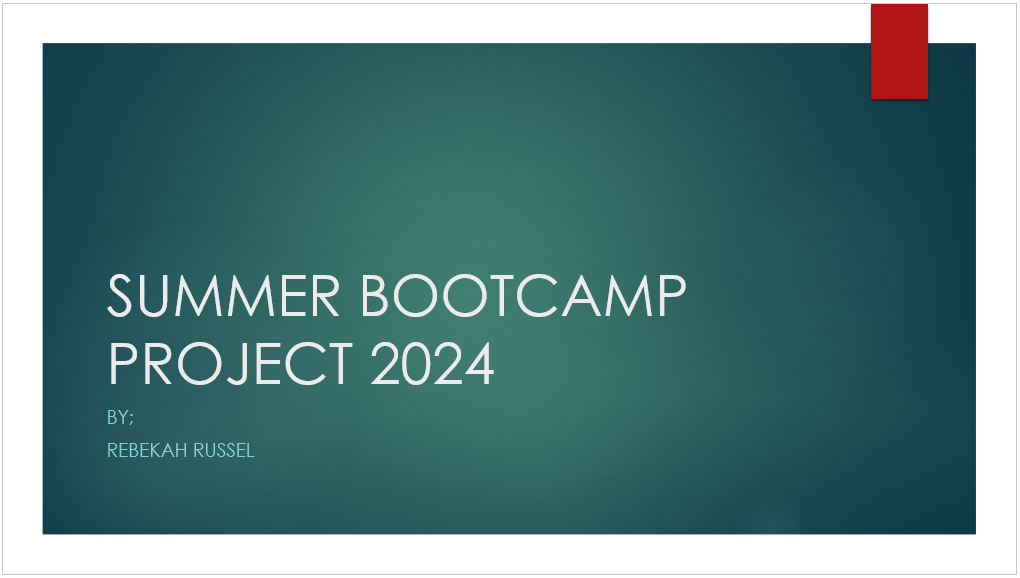

## Index

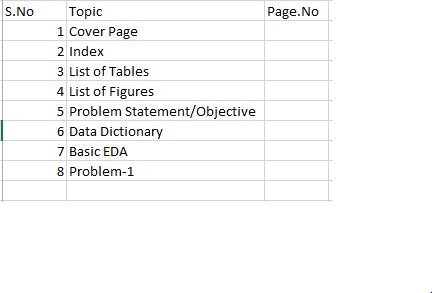

## List of Tables

## List of figures

## Problem statement/Objective

The Objective of this analysis is to gain insights into the characteristics of the wholesale data and answer key questions related to the wholesale.By understanding the data,we aim to inform strategies for improving the quality of data analysis and enhancing the overall customer satisfaction.The analysis will provide valuable insights and recommendations for stakeholders in the business sector

Data Description

* Buyer/Spender- ID's of customers
* Region- Region of the distributor
* Fresh- spending on Fresh Vegetables
* Milk- spending on milk
* Grocery- spending on grocery
* Frozen- spending on frozen food
* Detergents_paper- spending on detergents and toilet paper
* Delicatessen- spending on instant foods

## Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Dataset

In [2]:
import os
os.getcwd()

'C:\\Users\\A.S COMPUTER'

In [3]:
df=pd.read_csv("4-Wholesale Customer_New.csv")

# Basic Steps

## 1.Display the five top rows

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


## 2.Display the last 5 rows

In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


## 3.Display the shape of the Dataset

In [6]:
df.shape

(440, 9)

## 4.Check the datatype of each feature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    int64  
 1   Channel           437 non-null    object 
 2   Region            434 non-null    object 
 3   Fresh             440 non-null    object 
 4   Milk              440 non-null    int64  
 5   Grocery           440 non-null    int64  
 6   Frozen            437 non-null    float64
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      438 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 31.1+ KB


### Observations: The "Fresh"- spending on Fresh Vegetables is object instead of a numerical value

## 5.Check the statistical summary

In [8]:
df.describe()

,Buyer/Spender,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,437.000000,439.000000,438.000000
mean,220.500000,6035.779545,7951.277273,3085.638444,3773.747153,1531.057078
std,127.161315,8964.929649,9503.162829,4867.744145,19364.886053,2825.044262
min,1.000000,1.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,1525.250000,2153.000000,744.000000,256.500000,411.250000
50%,220.500000,3641.000000,4755.500000,1535.000000,813.000000,971.000000
75%,330.250000,7217.500000,10655.750000,3570.000000,3956.000000,1822.750000
max,440.000000,112400.000000,92780.000000,60869.000000,396100.000000,47943.000000


## 6.Check the null values

In [9]:
df.isna().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

## 7.Check the Duplicate Values

In [10]:
df.duplicated().sum()

0

## 8.Check the anomalies or wrong entities

In [80]:
df['Frozen'].unique()

array([ 214.        , 1762.        , 2405.        , 1567.        ,
       3915.        ,  666.        , 3085.63844394, 1669.        ,
        425.        , 1159.        , 4400.        , 1420.        ,
        287.        , 3095.        ,  294.        ,  397.        ,
        134.        ,  839.        , 2205.        ,  669.        ,
       1066.        , 3383.        , 5154.        , 2915.        ,
        201.        , 3151.        ,  485.        , 1158.        ,
       1200.        , 1148.        , 2088.        ,  266.        ,
       6130.        ,  833.        , 1729.        , 1920.        ,
         33.        , 2033.        ,  188.        ,  787.        ,
        541.        , 1740.        , 1668.        ,  584.        ,
       1798.        , 3860.        ,  239.        ,  532.        ,
        744.        , 2436.        , 1057.        , 2616.        ,
         38.        ,  596.        ,  129.        ,   96.        ,
       3254.        , 4154.        , 2896.        , 3724.     

In [79]:
df['Frozen'].value_counts()

3085.638444    46
2062.782656     9
1567.000000     7
364.000000      2
133.000000      2
               ..
118.000000      1
2995.000000     1
321.000000      1
2279.000000     1
65.000000       1
Name: Frozen, Length: 368, dtype: int64

In [22]:
df[df['Fresh']=='?']

,Buyer/Spender,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,3,Retail,?,8808,7684,2405.0,3516.0,7844.0
78,79,Hotel,?,1175,2067,2096.0,301.0,167.0


In [25]:
df['Fresh']=df['Fresh'].replace('?',np.nan)

In [78]:
df[df['Fresh']=='?']

,Buyer/Spender,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


## 9.Check the outliers and the authenticity

<Axes: >

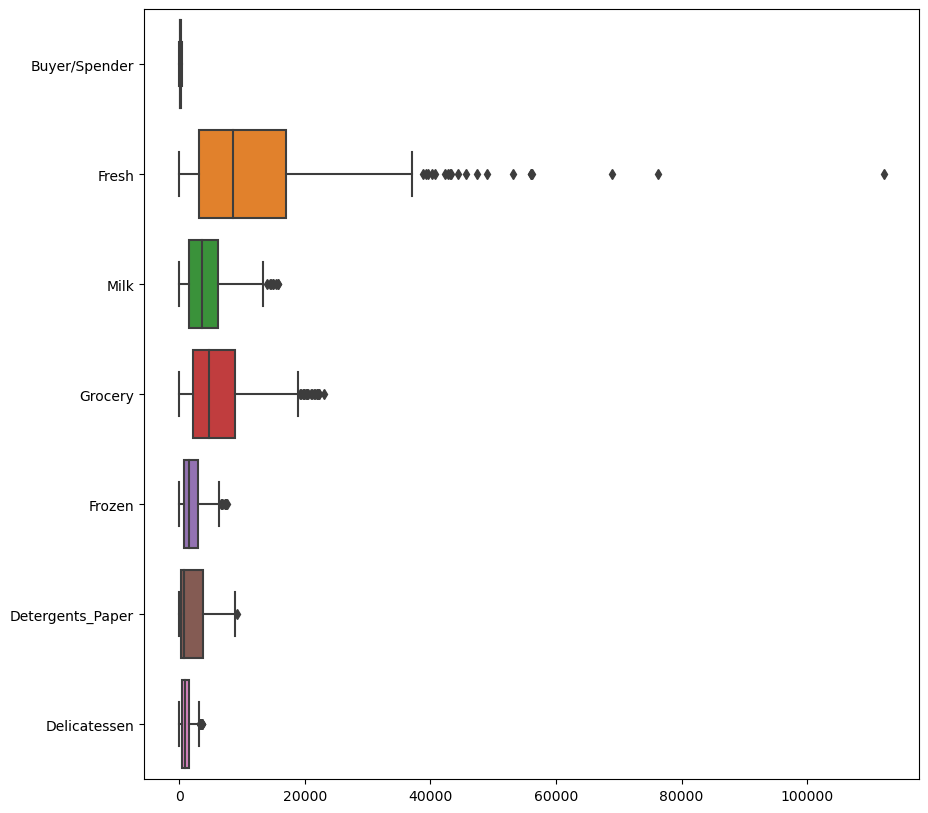

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.boxplot(data=data, orient='h')


## 10.Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

* Dropping Duplicates,unnecessary columns

In [13]:
# Drop unnecessary column
df.drop('Region', axis=1, inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

* null value imputation

In [19]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

character_columns = df.select_dtypes(include=['object']).columns
df[character_columns] = df[character_columns].fillna(df[character_columns].mode().iloc[0])


In [20]:
df.isna().sum()#checking again for any null values

Buyer/Spender       0
Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

* Outlier treatment

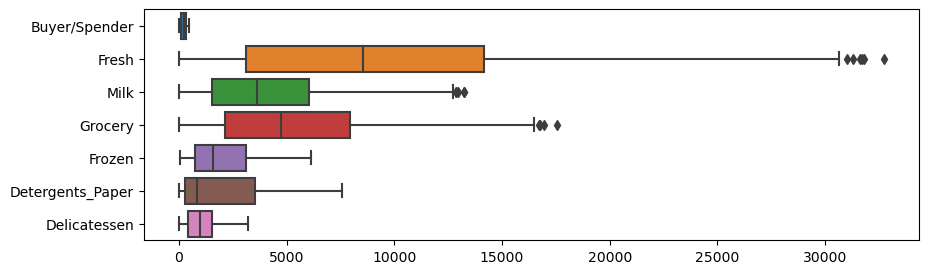

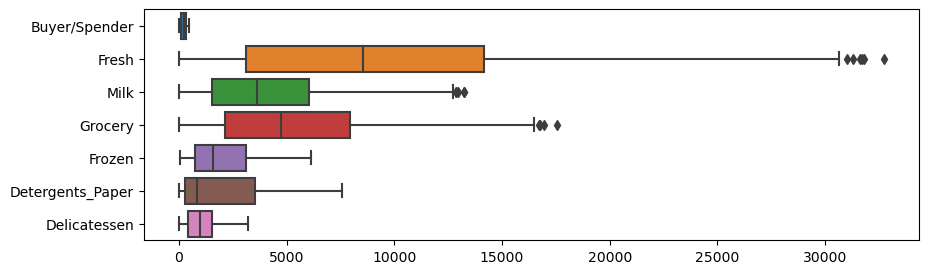

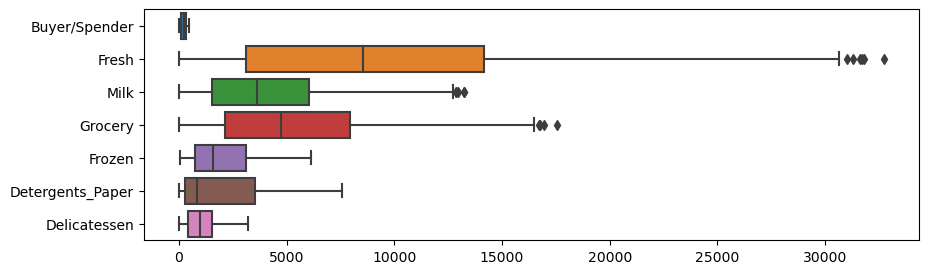

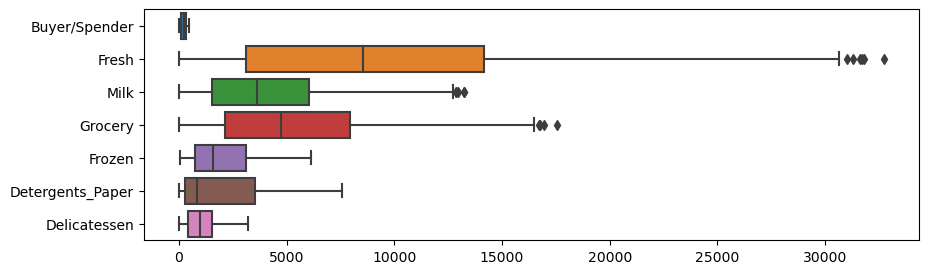

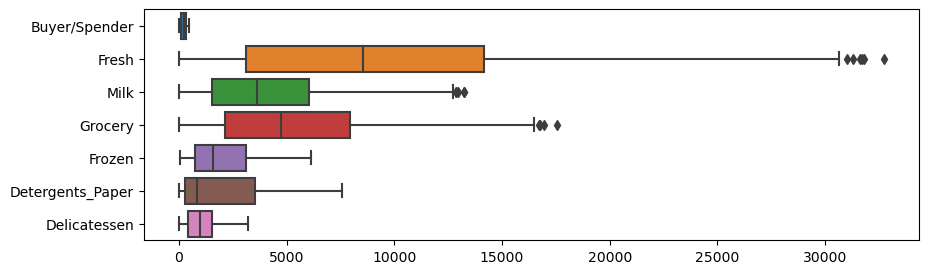

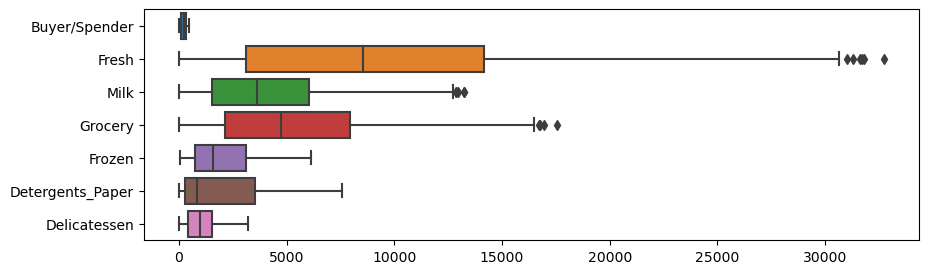

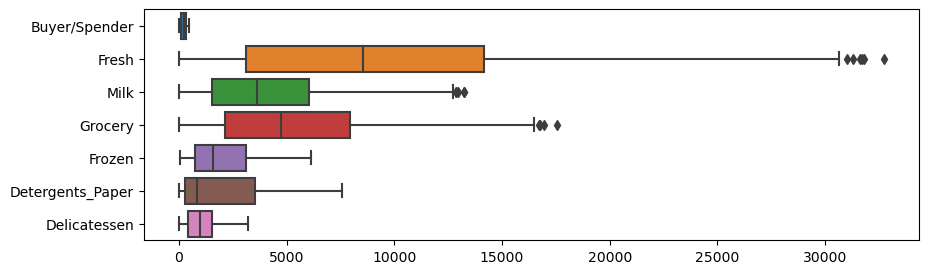

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in['Buyer/Spender','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=data, orient='h')

In [76]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

for i in df.columns:
    if df[i].dtype !='object':
        lr,ur=remove_outlier(df[i])
        df[i]=np.where(df[i]>ur,ur,df[i])
        df[i]=np.where(df[i]<lr,lr,df[i])

<Axes: >

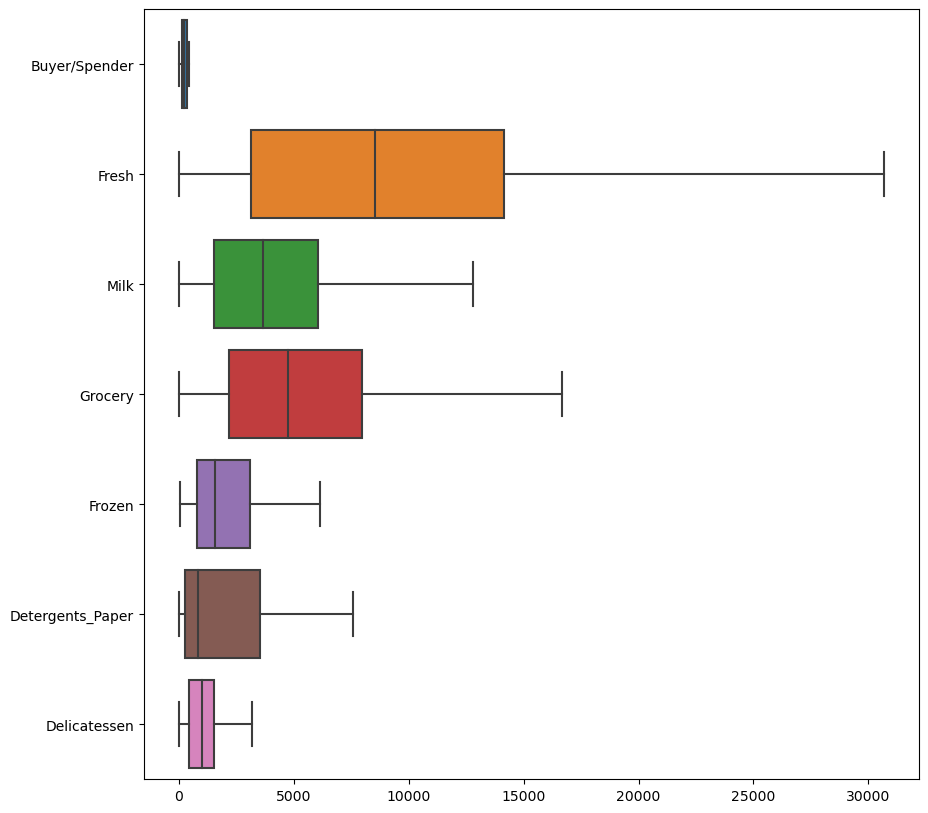

In [77]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, orient='h')
